<a href="https://colab.research.google.com/github/pankajraj007/Deep-Learning-projects/blob/master/NyN_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd drive/MyDrive/nyn

/content/drive/MyDrive/nyn


In [2]:
#!unzip yolov3.zip -d .

In [3]:
#!pip install -r requirements.txt

In [4]:
import tensorflow as tf
print(tf.__version__)
tf.test.gpu_device_name()

2.3.1


'/device:GPU:0'

In [5]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import tensorflow as tf
from yolov3.yolov4 import Create_Yolo
from yolov3.utils import load_yolo_weights, detect_image
from yolov3.configs import *

In [6]:
if YOLO_TYPE == "yolov4":
    Darknet_weights = YOLO_V4_TINY_WEIGHTS if TRAIN_YOLO_TINY else YOLO_V4_WEIGHTS
if YOLO_TYPE == "yolov3":
    Darknet_weights = YOLO_V3_TINY_WEIGHTS if TRAIN_YOLO_TINY else YOLO_V3_WEIGHTS

yolo = Create_Yolo(input_size=YOLO_INPUT_SIZE)
load_yolo_weights(yolo, Darknet_weights) # use Darknet weights

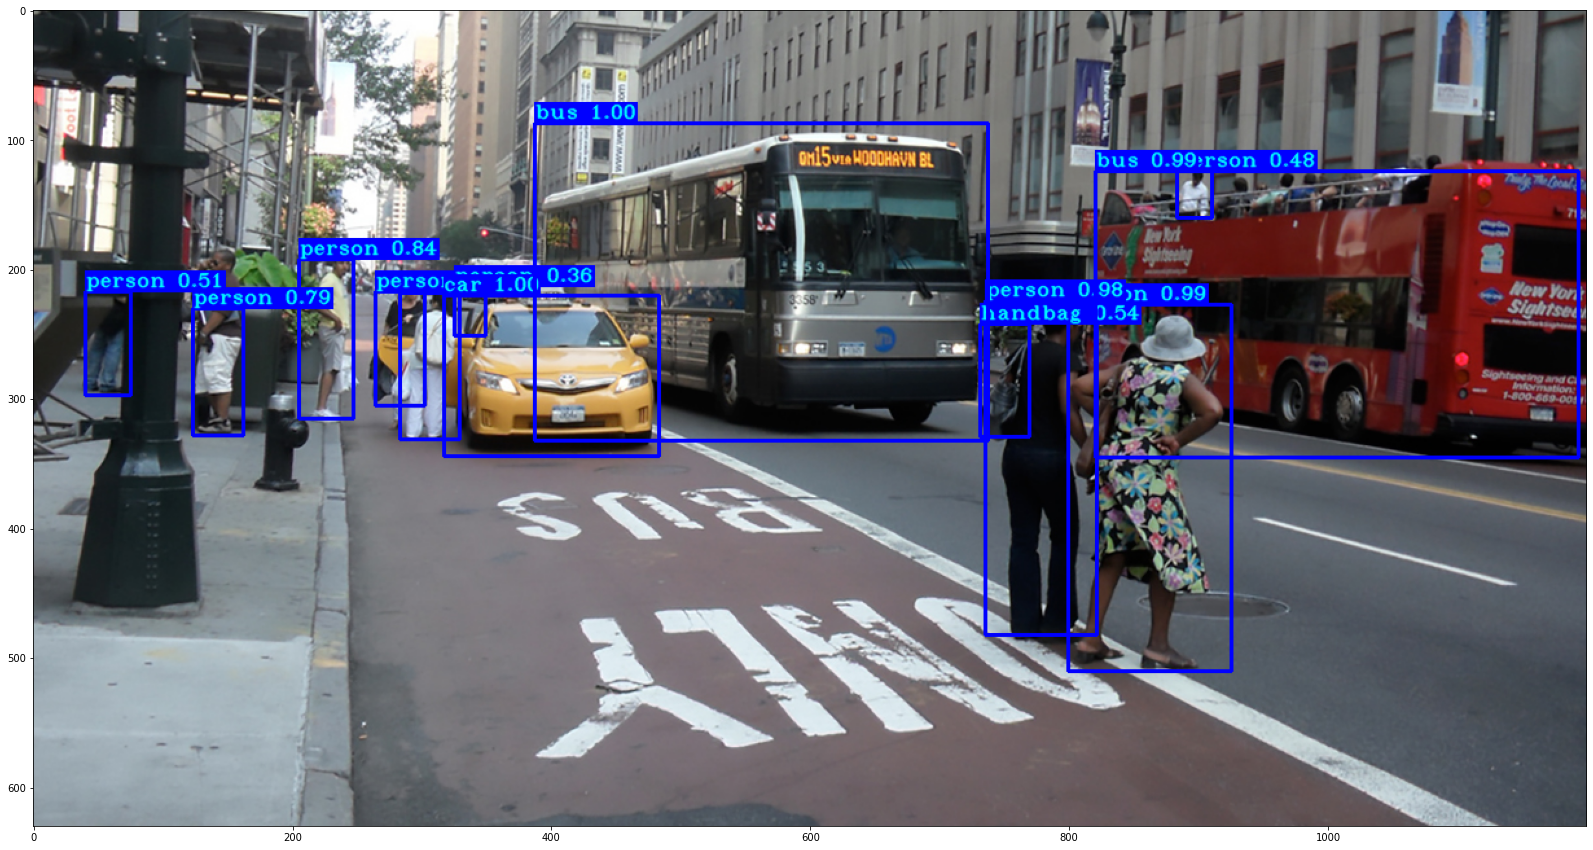

In [7]:
image_path   = "./IMAGES/street.jpg"

image = detect_image(yolo, image_path, '', input_size=YOLO_INPUT_SIZE, show=False, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)

In [8]:
#!python tools/XML_to_YOLOv3.py

In [9]:
from train import *
tf.keras.backend.clear_session()
main()

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11199145417188598790
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 8006187163990692602
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 1062379591623365992
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14613293312
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17574807867459441591
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]
RuntimeError in tf.config.experimental.list_physical_devices('GPU')
GPUs [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
skipping conv2d_74
skipping conv2d_66
skipping conv2d_58
epoch: 0 step:    2/13, lr:0.000008, giou_loss:  15.08, conf_loss:2155.49, prob_loss:  27.34, total_loss:

In [10]:
yolo = Create_Yolo(input_size=YOLO_INPUT_SIZE, CLASSES=TRAIN_CLASSES)
yolo.load_weights("./checkpoints/yolov3_custom") # use keras weights

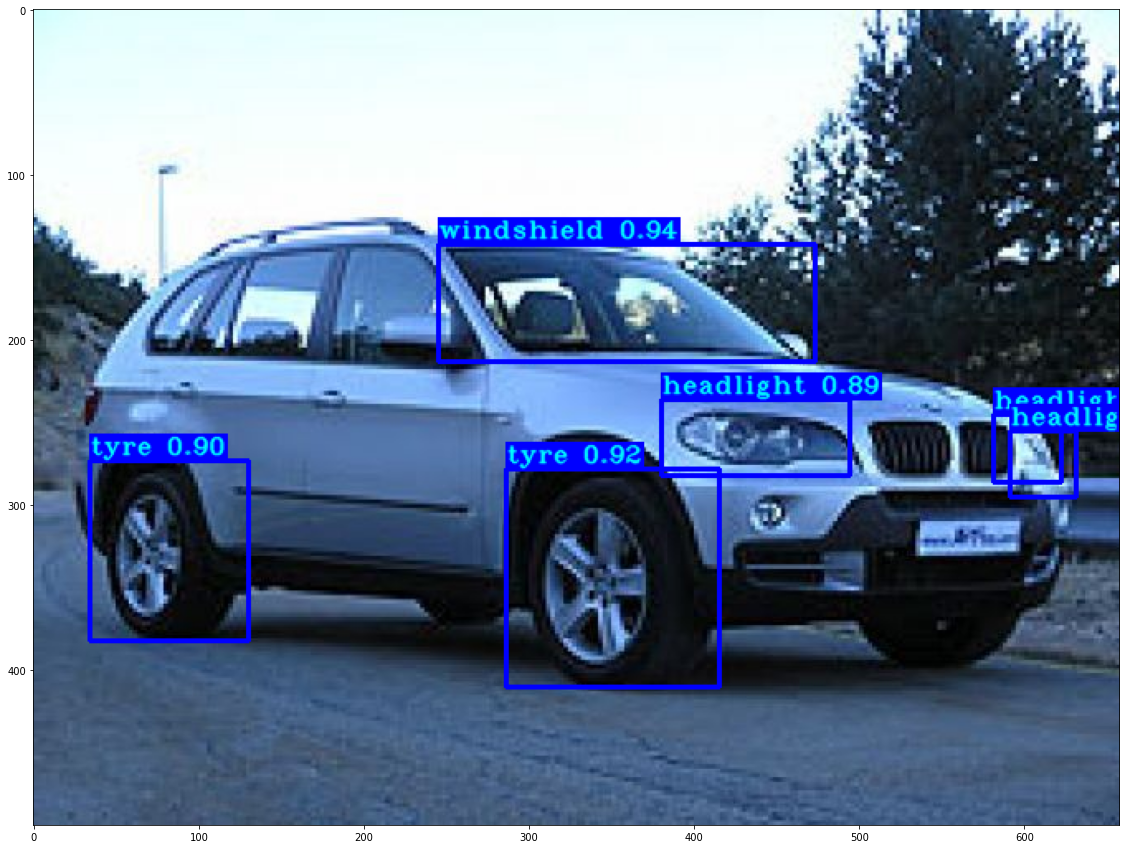

In [11]:
image_path   = r"./IMAGES/08118.jpg"
image = detect_image(yolo, image_path, "", input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)